# RNN: Recurent Neural Network on handwrting digits recognition

### import libraries

In [1]:
import numpy as np
from keras.layers import Dense, Activation, Input, SimpleRNN
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


### load data

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

### compute the number of labels

In [3]:
num_labels = len(np.unique(y_train))

### verify the data

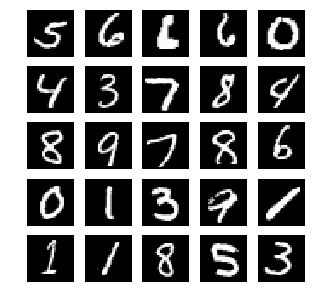

In [4]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

### resize and normalize

In [5]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size])
x_test = np.reshape(x_test,[-1,image_size,image_size])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### network parameters

In [6]:
input_shape = (image_size,image_size)
batch_size = 128
units = 256
dropout = 0.2
epochs = 20

### ### functional API to build CNN layers

In [7]:
inputs = Input(shape=input_shape)
y = SimpleRNN(units=units,dropout=dropout)(inputs)

### outputs

In [8]:
outputs = Dense(num_labels,activation='softmax')(y)

### build the model

In [9]:
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


### train the model

In [10]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=20,batch_size=batch_size)
print("\n")
print(history.history.keys())

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.7885 - accuracy: 0.7693 - val_loss: 0.3790 - val_accuracy: 0.8941
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.3585 - accuracy: 0.8936 - val_loss: 0.2332 - val_accuracy: 0.9337
Epoch 3/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.2685 - accuracy: 0.9198 - val_loss: 0.1771 - val_accuracy: 0.9487
Epoch 4/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.2213 - accuracy: 0.9346 - val_loss: 0.1455 - val_accuracy: 0.9562
Epoch 5/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.1977 - accuracy: 0.9407 - val_loss: 0.1505 - val_accuracy: 0.9561
Epoch 6/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.1733 - accuracy: 0.9485 - val_loss: 0.1368 - val_accuracy: 0.9605
Epoch 7/20
60000/60000 [==============================] 

### evaluate the model


In [11]:
score = model.evaluate(x_test,y_test,batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100*score[1]))
print("\n")

10000/10000 [==============================] - 1s 60us/step

Test accuracy: 98.3%




### plotting


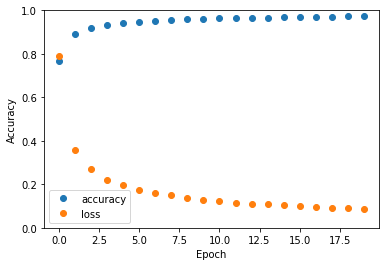

In [14]:
plt.plot(history.history['accuracy'],'o',label='accuracy')
plt.plot(history.history['loss'],'o',label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='best')
plt.show()